In [1]:
%cd /content/drive/MyDrive/AI LLM 교육/프로젝트/공격유형

/content/drive/MyDrive/AI LLM 교육/프로젝트/공격유형


### 데이터 확인
* ID : 샘플별 고유 ID
* ip_src, ip_dst : 송수신 IP 주소
* port_src, port_dst : 송수신 포트 번호
* protocol : 프로토콜 종류 (TCP, UDP)
* duration : 통신 지속 시간(초)
* pkt_count_fwd, pkt_count_bwd : 송수신 방향 패킷 수
* rate_fwd_pkts, rate_bwd_pkts : 송수신 패킷 전송 속도
* rate_fwd_bytes, rate_bwd_bytes : 송수신 바이트 전송 속도
* payload_fwd_mean, payload_bwd_mean : 송수신 페이로드 평균 바이트
* tcp_win_fwd_init, tcp_win_bwd_init : 송수신 측 TCP 윈도우 초기값
* tcp_syn_count, tcp_psh_count, tcp_rst_count : SYN/PSH/RST 패킷 수
* iat_avg_packets : 패킷 간 평균 간격 시간(초)



> attack_type : 공격 유형 또는 정상(Benign)
  * 정상 트래픽
    * Benign : 정상
  * DDoS 계열
    * DDoS : **Distributed Denial of Service**
    * Hulk : **Hypertext Unique Looking Krawler** 파라미터가 지속적으로 변경되는 것을 제외하고는 일반적으로 GET Flooding과 동일
    * GoldenEye : 멀티스레드를 활용해 HTTP 요청 폭탄을 발생시키는 공격
    * Slowloris : HTTP 요청을 매우 천천히 보내 리소스를 고갈 시키는 저속형 DDoS
    * Slow_HTTP : 다양한 HTTP Method를 이용한 느린 요청
  * 크리덴셜 공격
    * FTP_Brute_Force : FTP 서버에 대해 아이디/비밀번호 무차별 대입 공격을 통해 접속권한 탈취
    * Web_Brute_Force : 웹 로그인 폼을 대상으로 아이디/비밀번호 무차별 대입 공격을 통해 사용자 계정 탈취
    * SSH_Brute_Force : **Secure Shell** 서버 원격 접속 권한 탈취
  * 정찰/탐색
    * Port_Scanning : 대상 서버에 열린 포트 탐색하여 취약한 서비스 존재 여부 확인
  * 웹 취약점
    * Web_XSS : **Cross Site Scripting** 웹사이트에 악의적인 코드를 삽입하여, 사용자 브라우저에서 실행되게 하는 공격
  * 좀비 네트워크
    * Botnet : 악성코드에 감염된 장비 네트워크를 원격 제어하는 시스템


In [2]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
0,TRAIN_00000,192.168.10.18,3721.0,192.168.10.243,55.0,UDP,0.000231,2,2,8656.974200,...,1.142721e+06,81.000000,81.000000,0,0,0,0,0,NaN,Benign
1,TRAIN_00001,192.168.10.5,NaN,NaN,91.0,TCP,0.000000,0,1,0.000000,...,0.000000e+00,0.000000,0.000000,0,16392,0,0,0,1.499097e+09,Benign
2,TRAIN_00002,172.16.0.182,NaN,192.168.10.18,83.0,TCP,0.606002,11,5,18.151760,...,1.913360e+04,790.125000,790.125000,29200,28960,2,4,1,4.040012e-02,Hulk
3,TRAIN_00003,NaN,47668.0,192.168.10.18,NaN,TCP,1.003829,6,6,5.977114,...,1.155077e+04,993.416667,993.416667,29200,28960,3,2,0,9.125718e-02,Hulk
4,TRAIN_00004,192.168.10.5,51753.0,151.101.2.116,451.0,TCP,181.195271,62,89,NaN,...,6.896758e+02,NaN,NaN,8192,29200,2,22,0,NaN,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,TRAIN_11994,192.168.10.243,62329.0,192.168.10.249,49.0,UDP,0.023636,1,1,42.308586,...,5.542425e+03,91.000000,91.000000,0,0,0,0,0,2.363586e-02,Benign
11995,TRAIN_11995,192.168.10.243,60190.0,192.168.10.249,54.0,UDP,0.061452,1,1,16.272824,...,1.253007e+03,61.000000,61.000000,0,0,0,0,0,6.145215e-02,Benign
11996,TRAIN_11996,NaN,5741.0,NaN,NaN,UDP,0.049973,2,2,40.021603,...,3.641966e+03,66.000000,66.000000,0,0,0,0,0,1.665767e-02,Benign
11997,TRAIN_11997,NaN,56610.0,192.168.10.243,NaN,UDP,0.047832,2,2,41.813002,...,5.937446e+03,103.500000,103.500000,0,0,0,0,0,1.594400e-02,Benign


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11999 non-null  object 
 1   ip_src            9487 non-null   object 
 2   port_src          8625 non-null   float64
 3   ip_dst            10695 non-null  object 
 4   port_dst          9712 non-null   float64
 5   protocol          11999 non-null  object 
 6   duration          10925 non-null  float64
 7   pkt_count_fwd     11999 non-null  int64  
 8   pkt_count_bwd     11999 non-null  int64  
 9   rate_fwd_pkts     10828 non-null  float64
 10  rate_bwd_pkts     10312 non-null  float64
 11  rate_fwd_bytes    11999 non-null  float64
 12  rate_bwd_bytes    11999 non-null  float64
 13  payload_fwd_mean  10214 non-null  float64
 14  payload_bwd_mean  10214 non-null  float64
 15  tcp_win_fwd_init  11999 non-null  int64  
 16  tcp_win_bwd_init  11999 non-null  int64 

### 수치형 컬럼 시각화

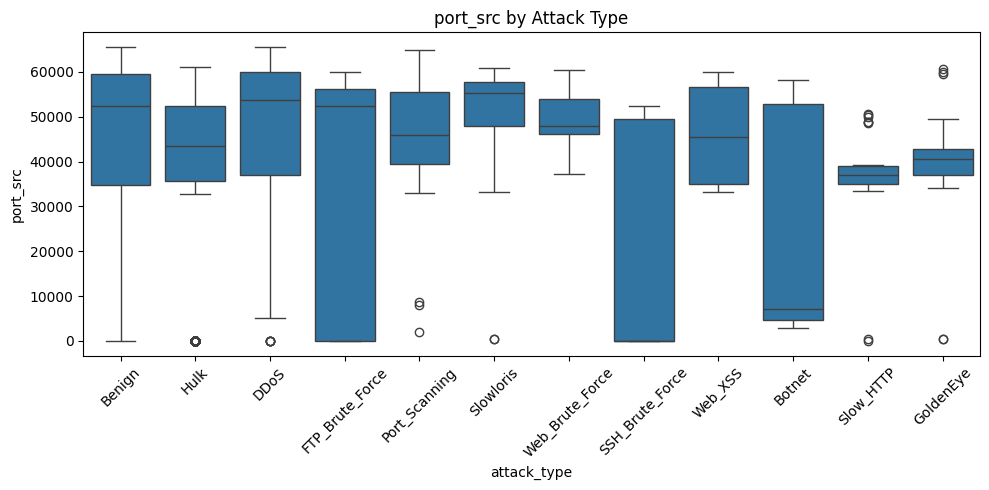

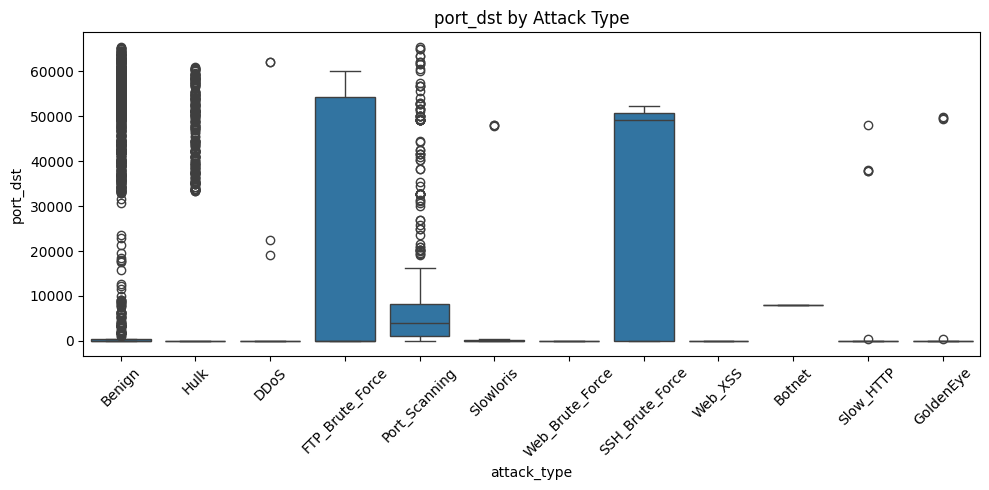

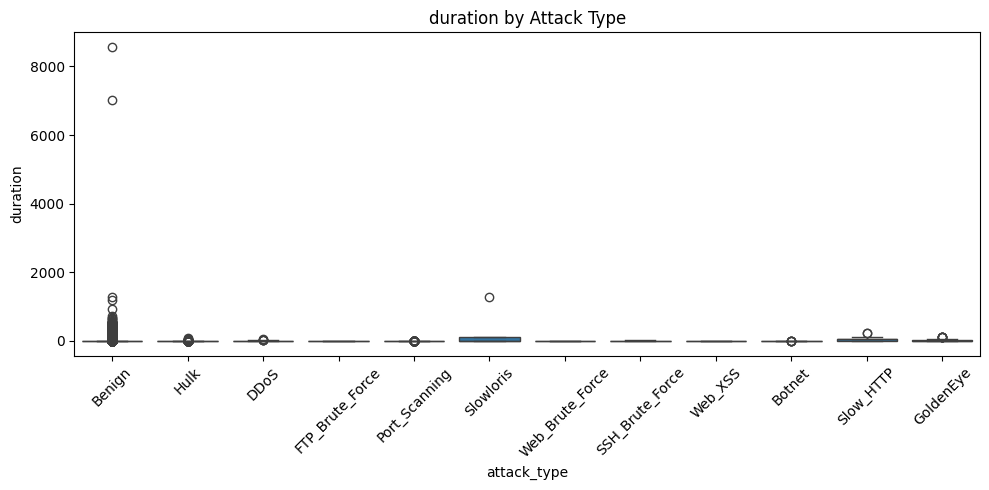

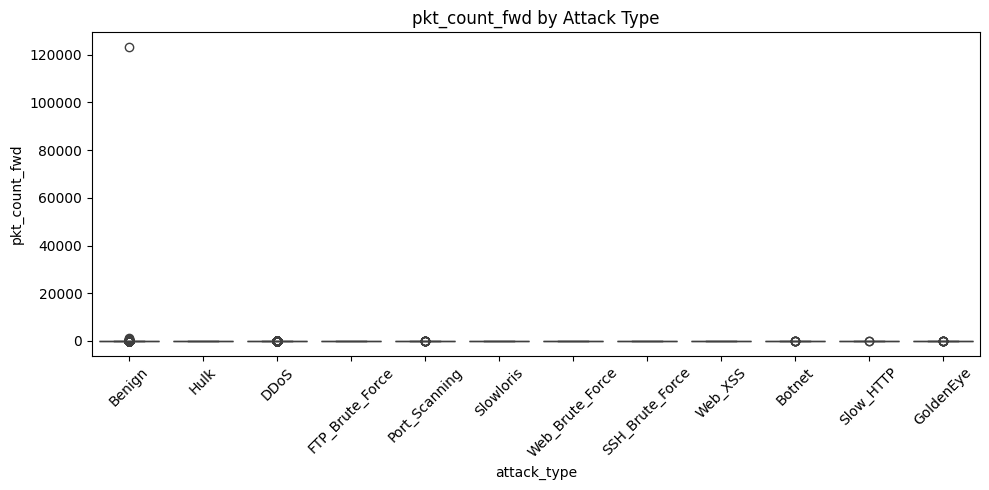

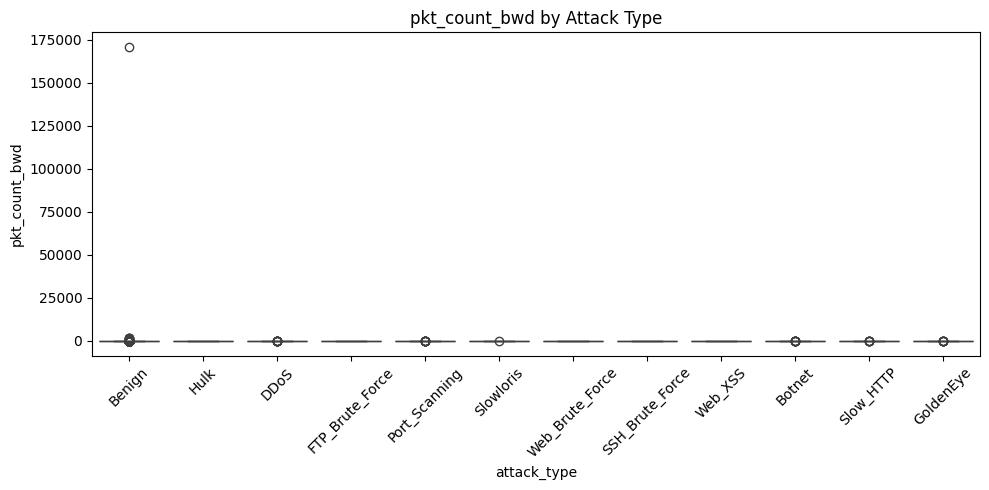

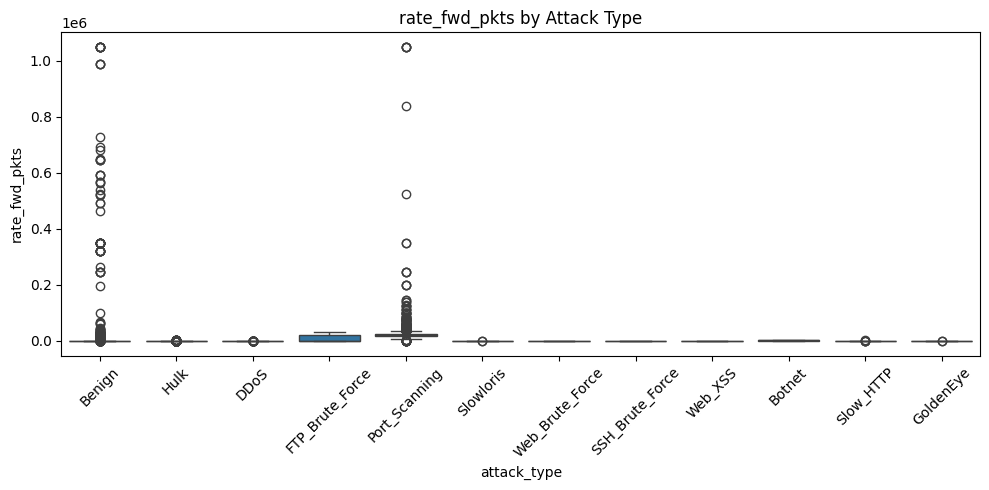

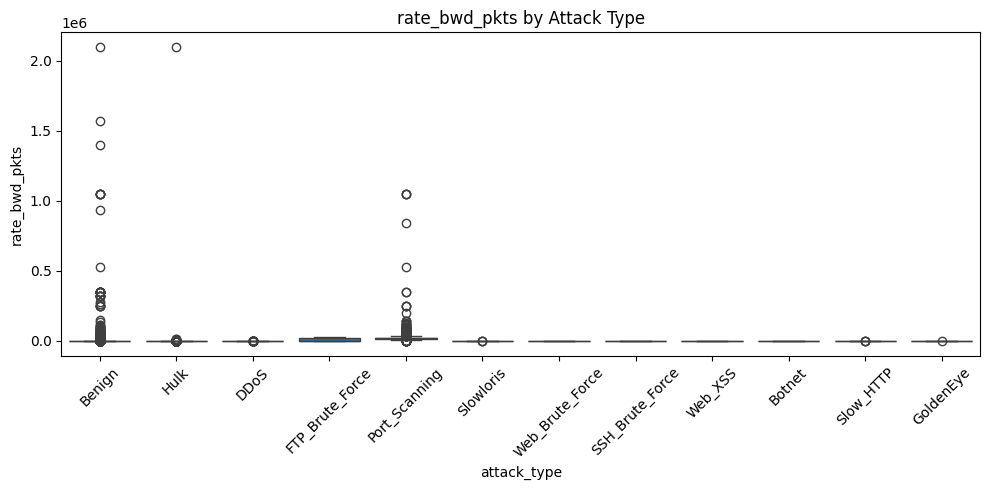

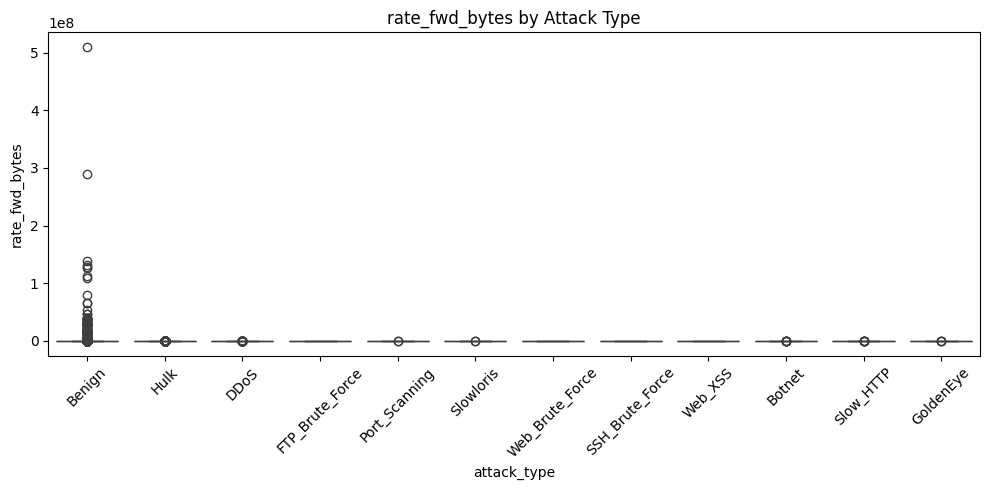

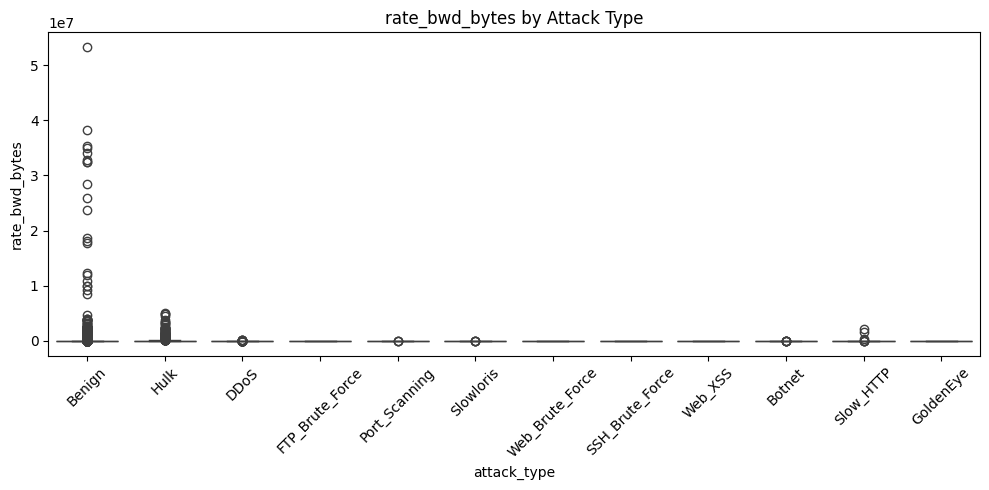

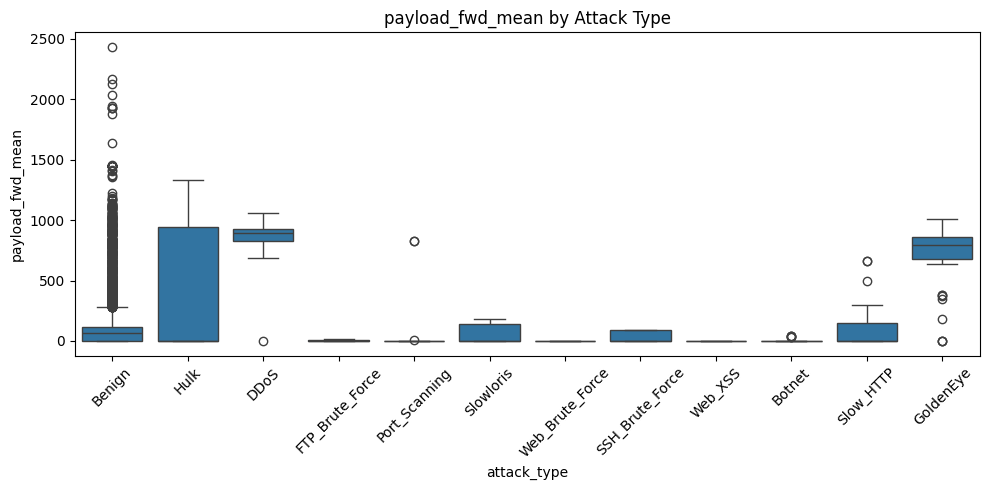

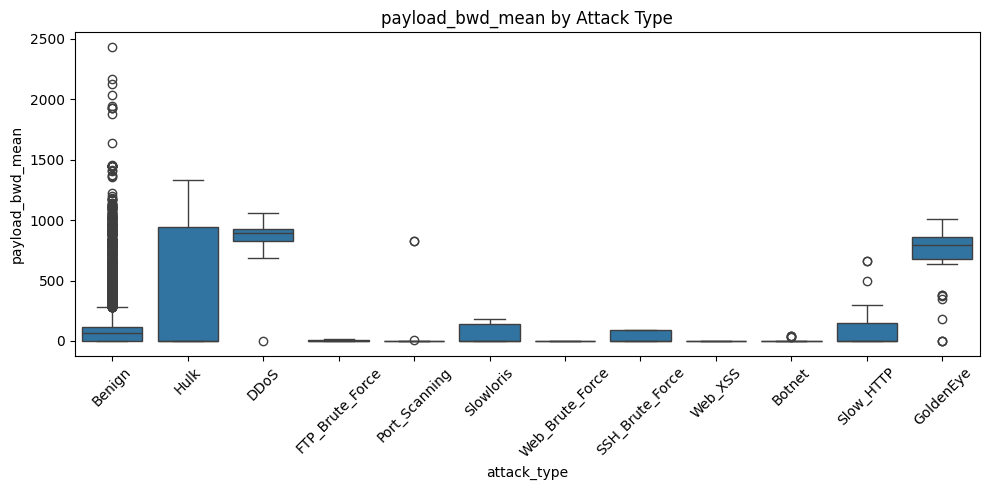

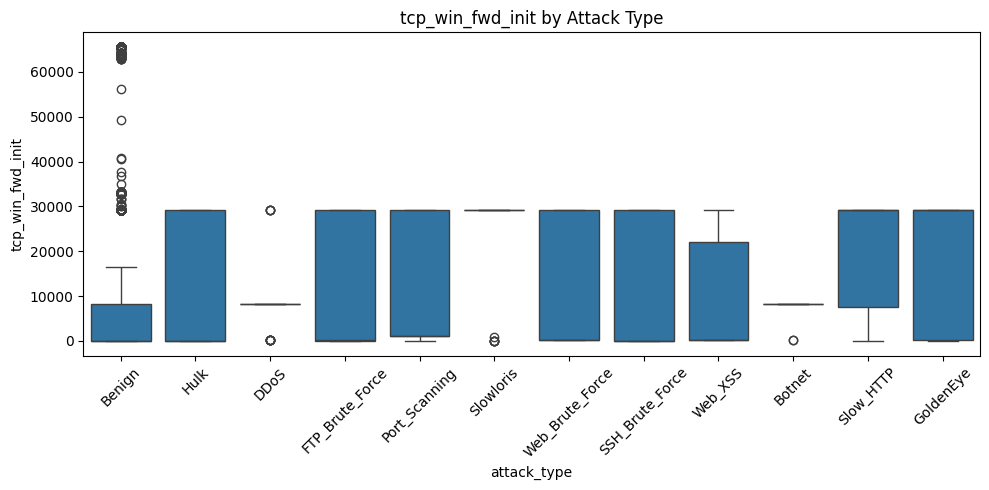

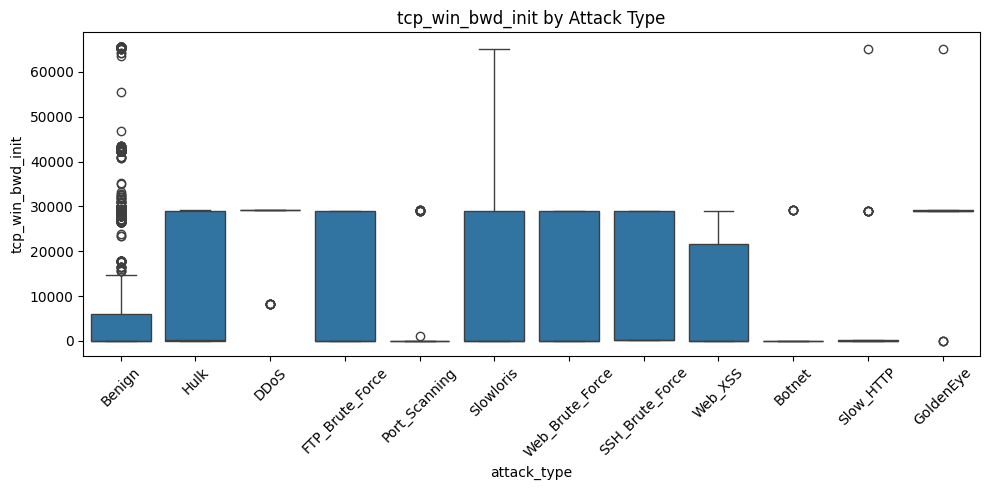

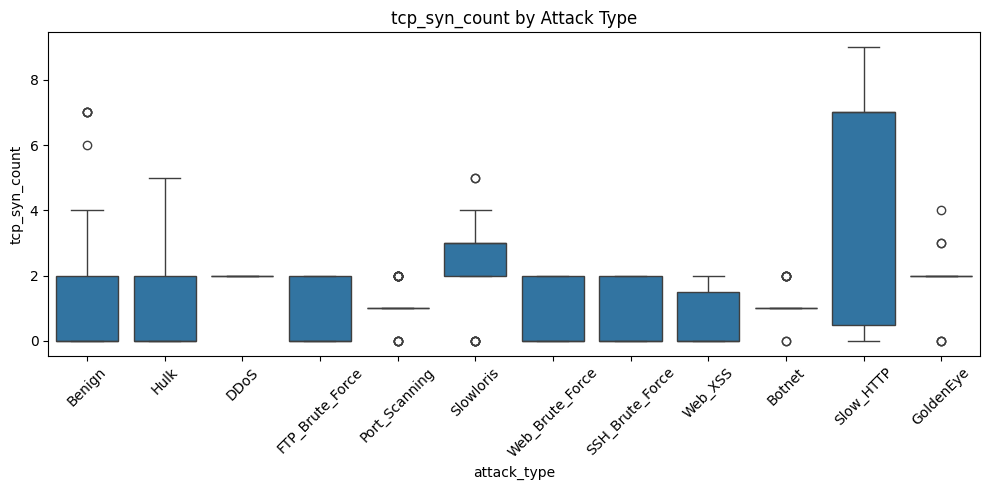

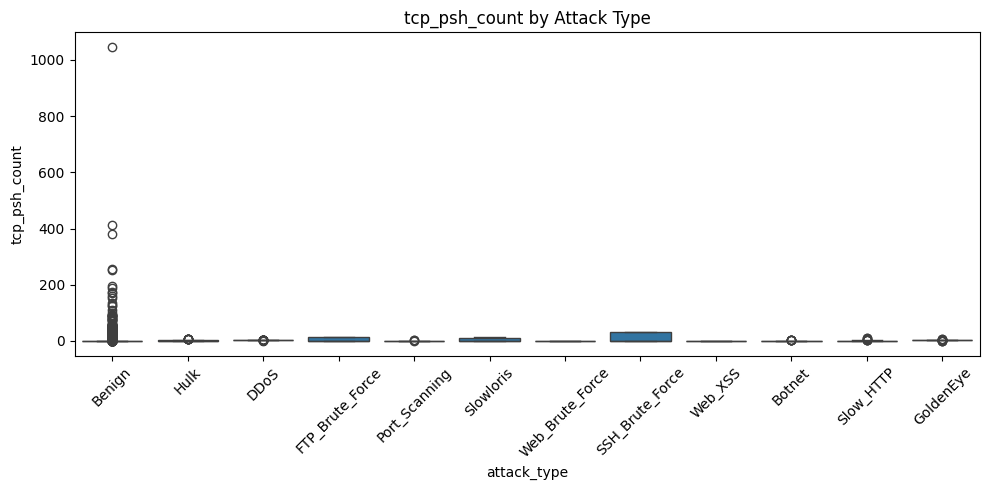

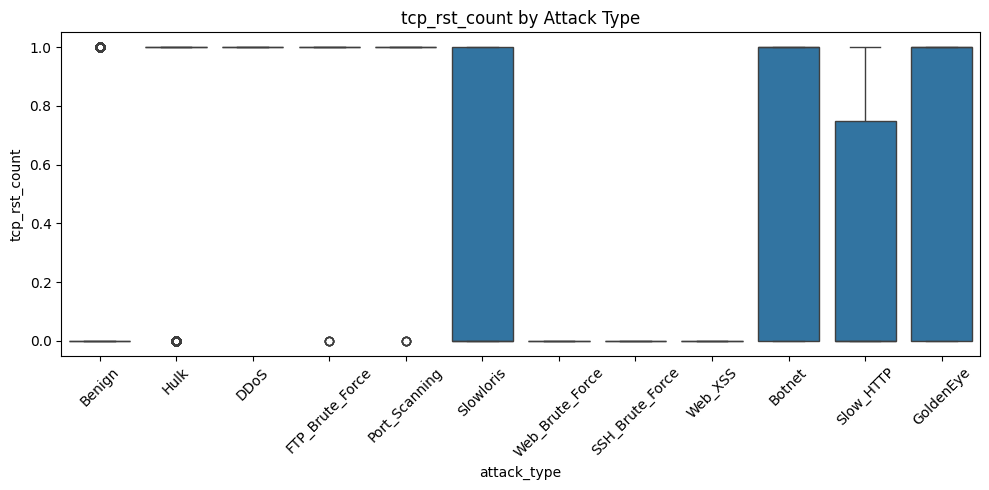

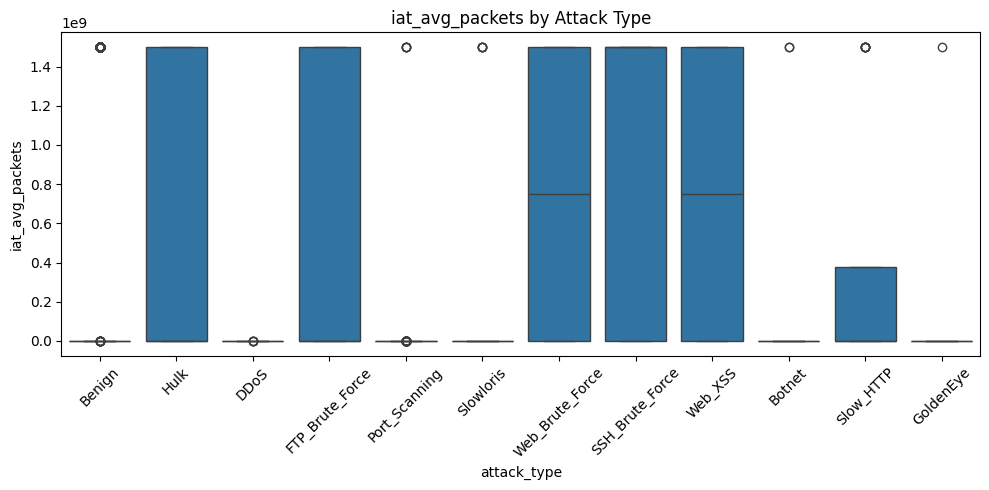

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 수치형 컬럼 리스트
numeric_cols = test.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 개별 박스 플롯 시각화
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=train, x='attack_type', y=col)
    plt.title(f"{col} by Attack Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 이상치 제거
* duration 6000 이상
* pkt_count_fwd 100000 이상
* pkt_count_bwd 150000 이상
* tcp_psh_count 1000 이상

In [5]:
train[(train.duration >= 6000) | (train.pkt_count_fwd >= 100000) | (train.pkt_count_bwd >= 150000) | (train.tcp_psh_count >= 1000)]

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
4166,TRAIN_04166,NaN,50510.0,23.15.4.230,83.0,TCP,121.616195,123229,170796,1013.261433,...,3.284043e+06,1358.369686,1358.369686,8192,29200,2,1046,0,0.000414,Benign
8594,TRAIN_08594,NaN,113.0,129.6.15.223,122.0,UDP,8567.023224,62,62,0.007237,...,3.473785e-01,48.000000,48.000000,0,0,0,0,0,NaN,Benign
11117,TRAIN_11117,192.168.10.36,131.0,128.138.141.55,118.0,UDP,7033.059485,68,68,0.009669,...,4.640939e-01,48.000000,48.000000,0,0,0,0,0,52.096737,Benign


In [6]:
# 제거하고 나니까 예상대로 다른 공격에 비해 확실히 slowloris와 slow_http가 duration(통신 지속 시간)이 긴 것으로 확인됨
train[train.duration >= 1200]

,ID,ip_src,port_src,ip_dst,port_dst,protocol,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,...,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets,attack_type
72,TRAIN_00072,172.16.0.182,53982.0,192.168.10.18,75.0,TCP,1277.156398,17,17,0.013311,...,0.378184,24.058824,24.058824,29200,28960,2,15,0,NaN,Slowloris
8354,TRAIN_08354,192.168.10.232,130.0,198.58.105.0,117.0,UDP,1280.058094,25,25,NaN,...,0.937457,NaN,NaN,0,0,0,0,0,26.123635,Benign
8594,TRAIN_08594,NaN,113.0,129.6.15.223,122.0,UDP,8567.023224,62,62,0.007237,...,0.347379,48.000000,48.000000,0,0,0,0,0,NaN,Benign
11117,TRAIN_11117,192.168.10.36,131.0,128.138.141.55,118.0,UDP,7033.059485,68,68,0.009669,...,0.464094,48.000000,48.000000,0,0,0,0,0,52.096737,Benign


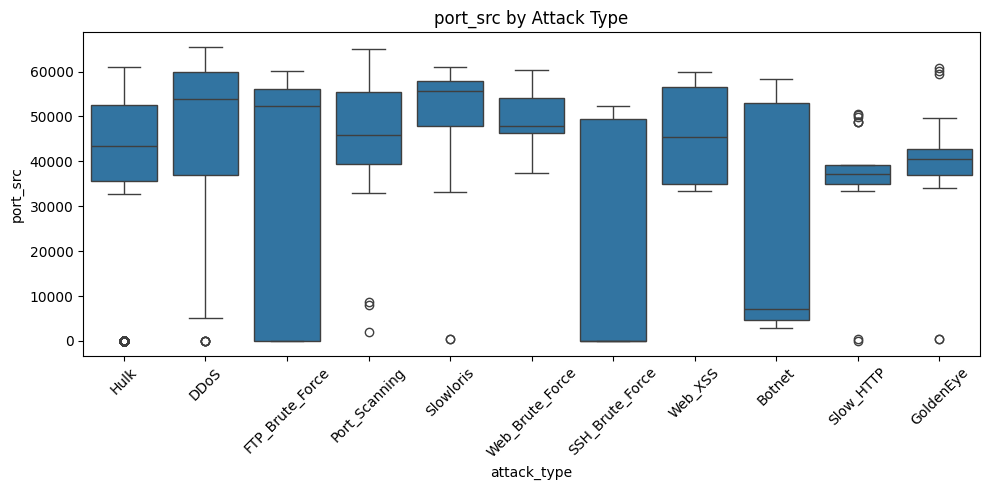

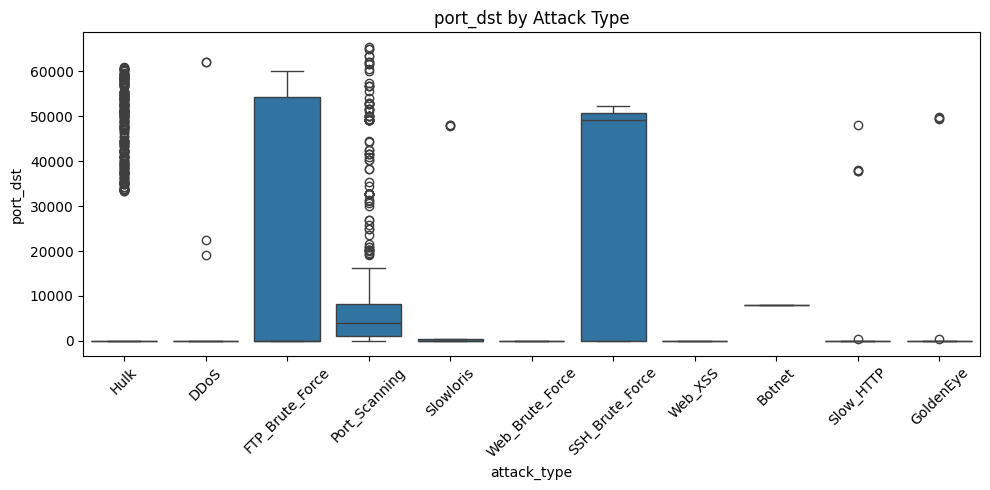

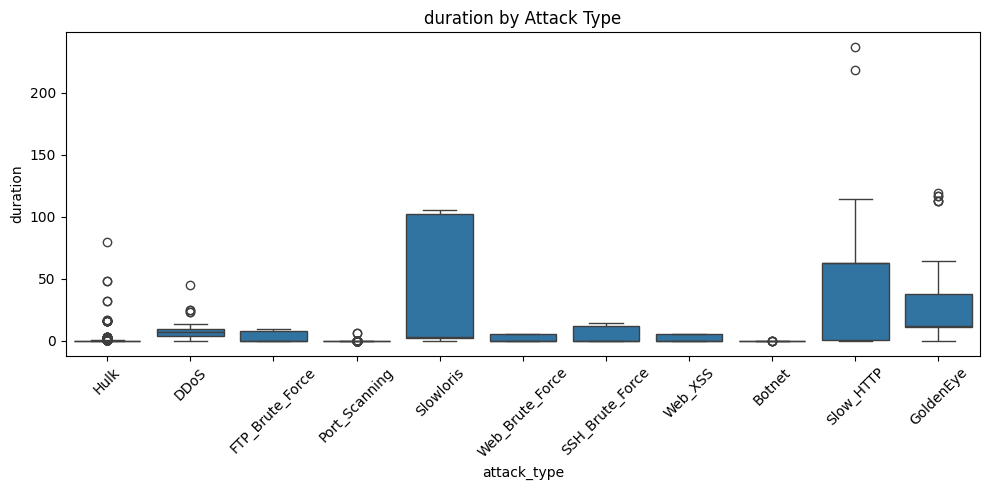

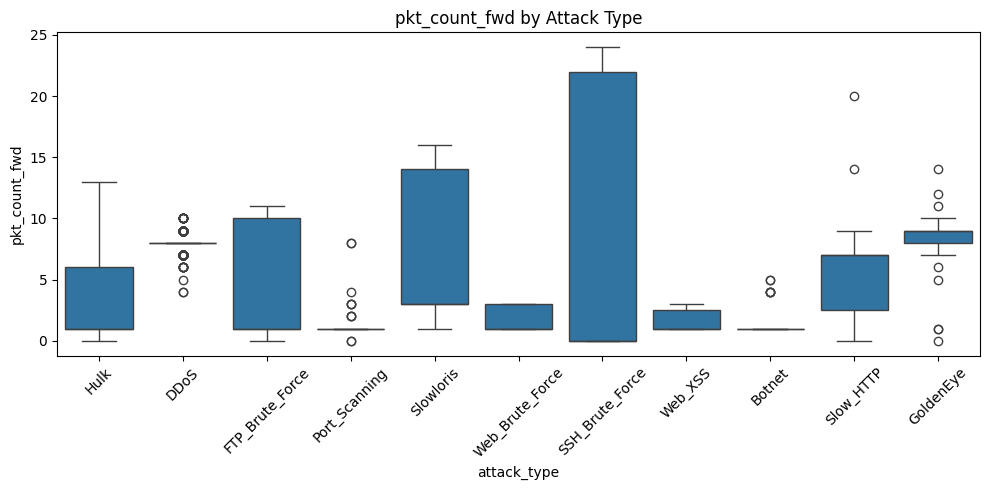

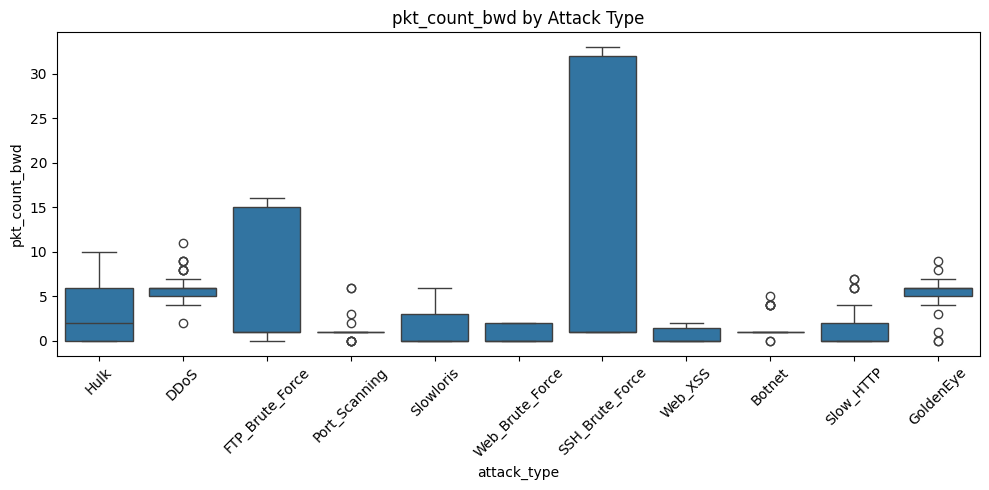

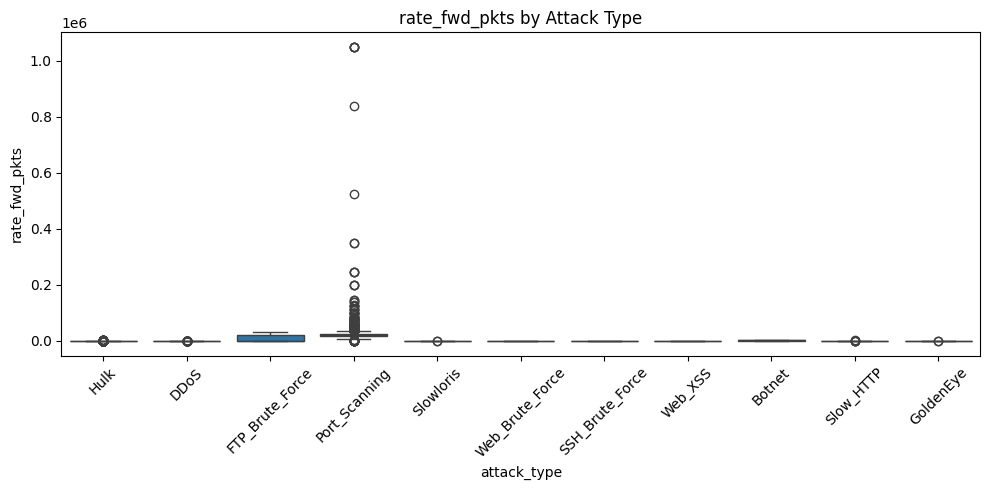

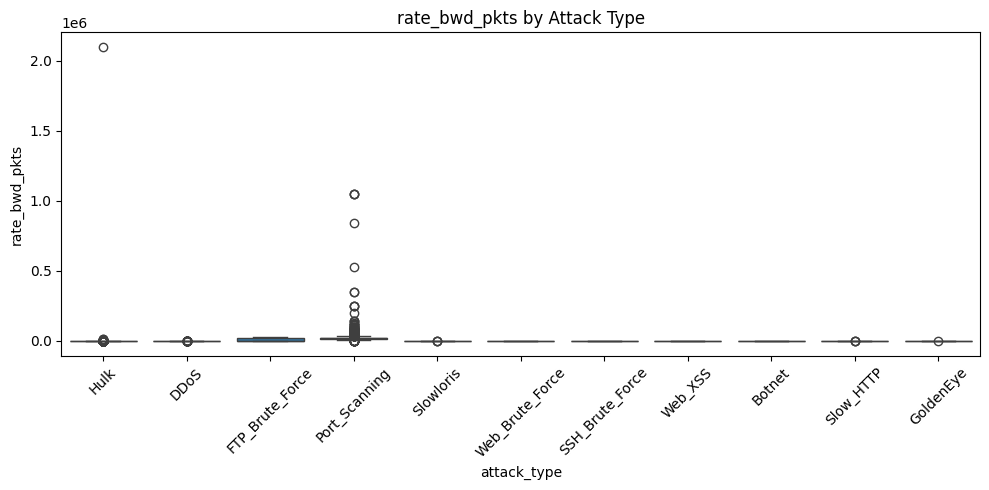

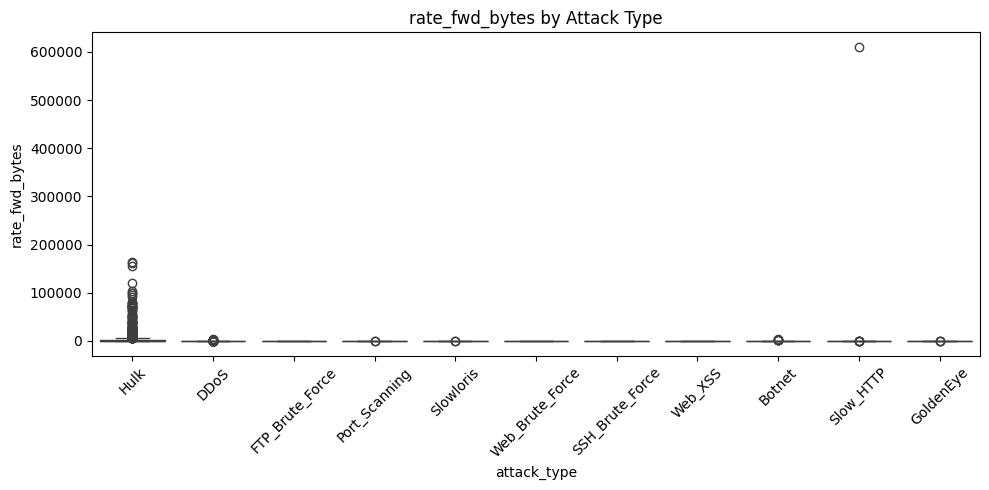

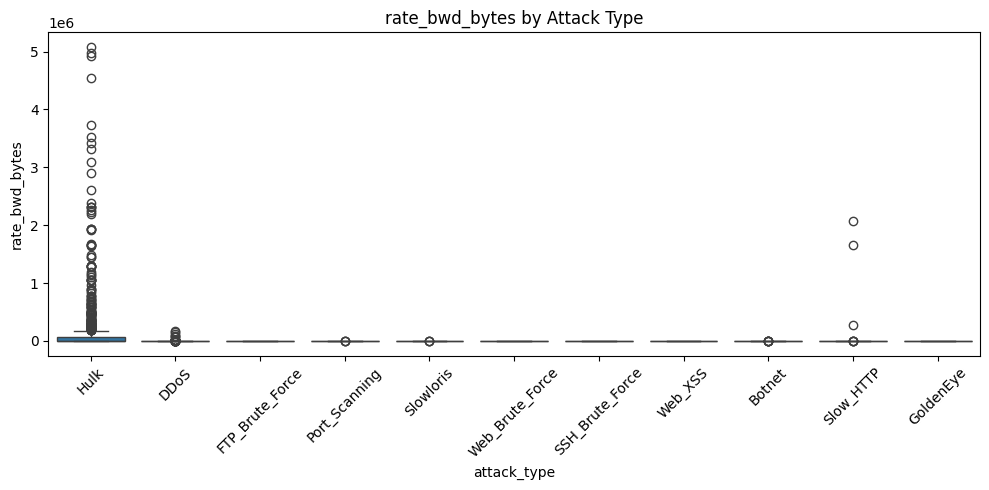

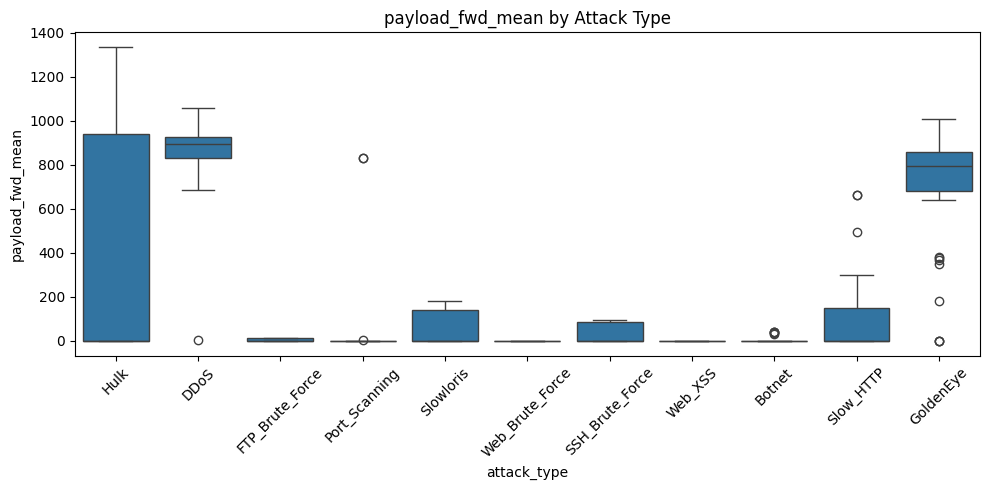

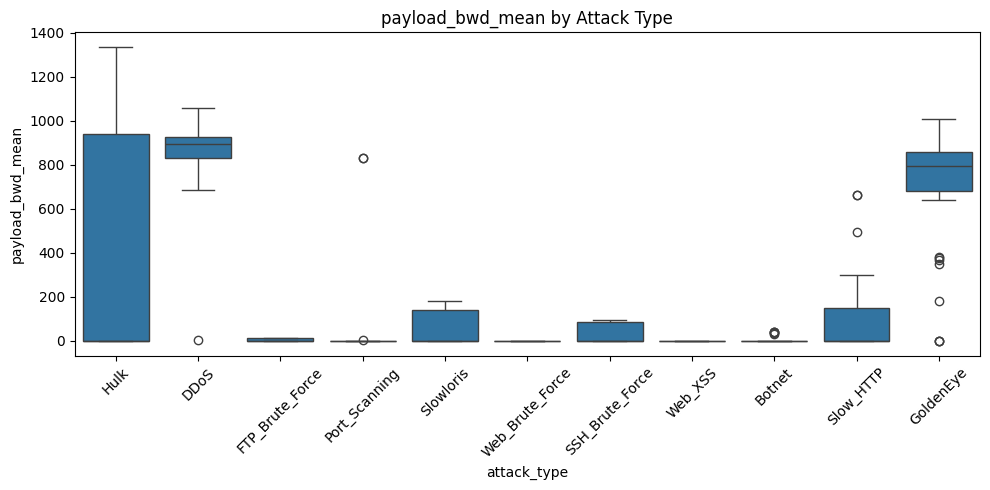

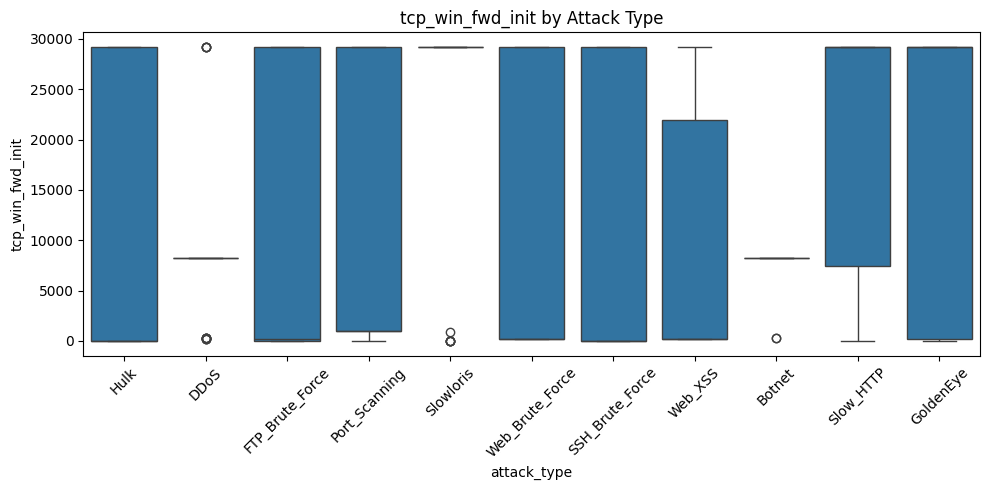

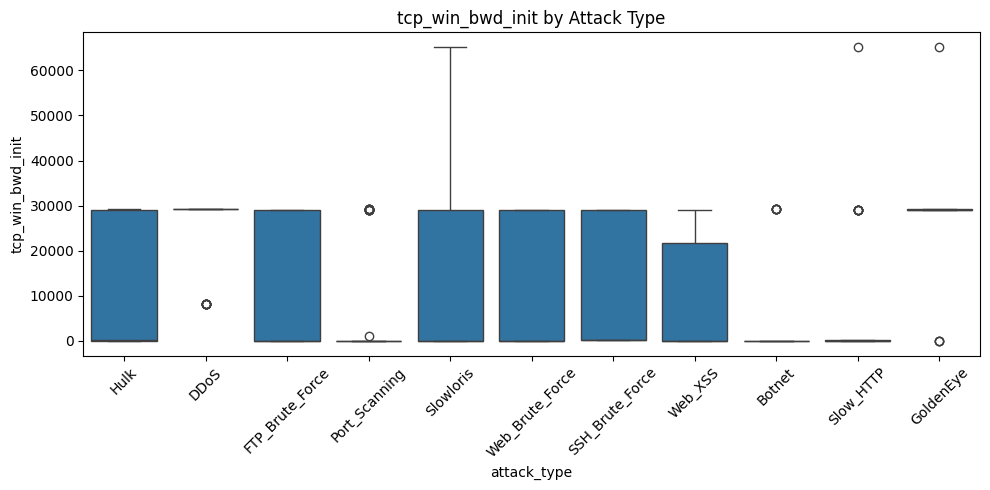

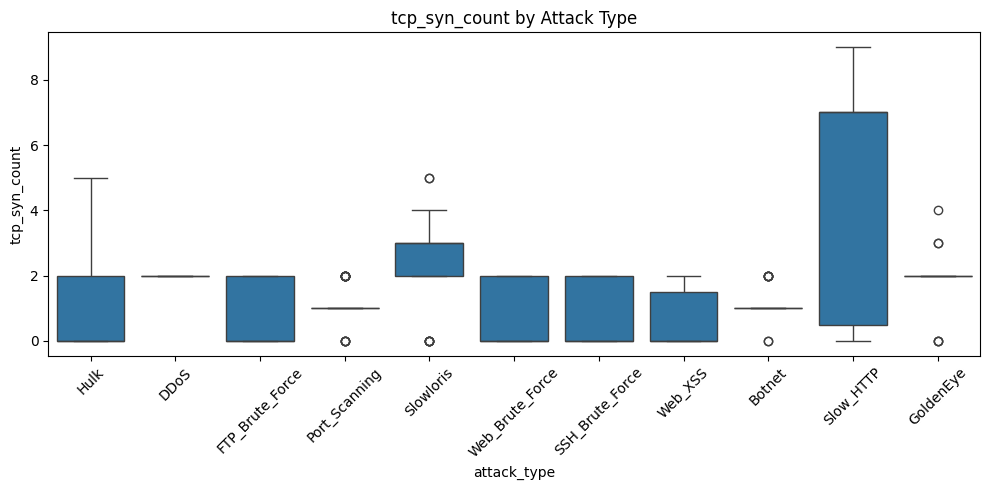

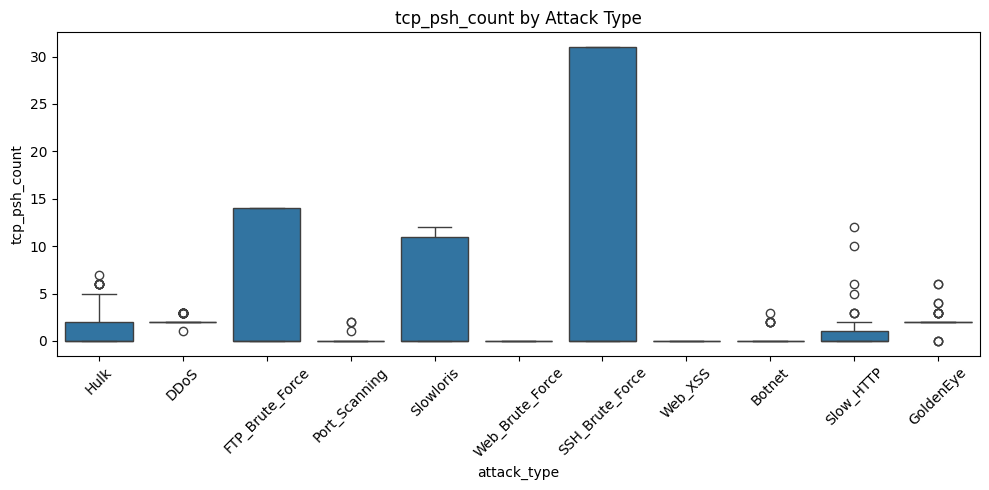

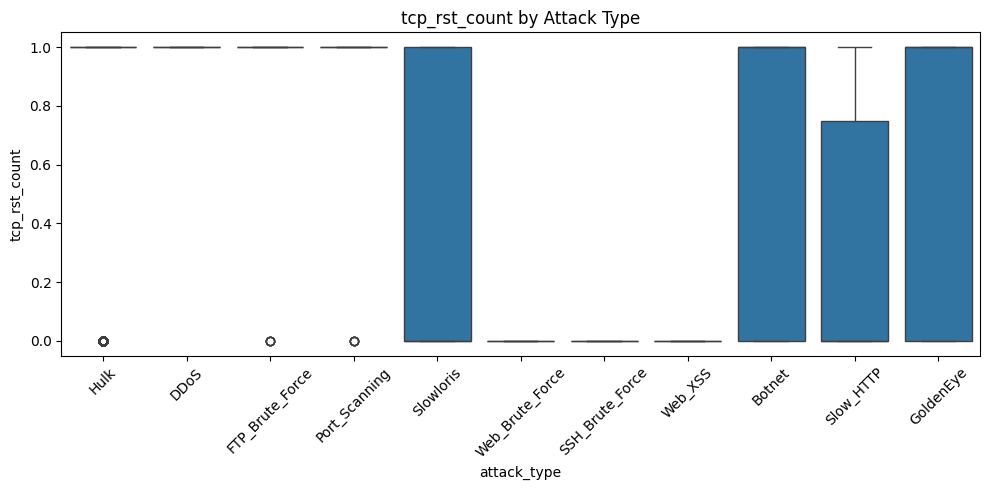

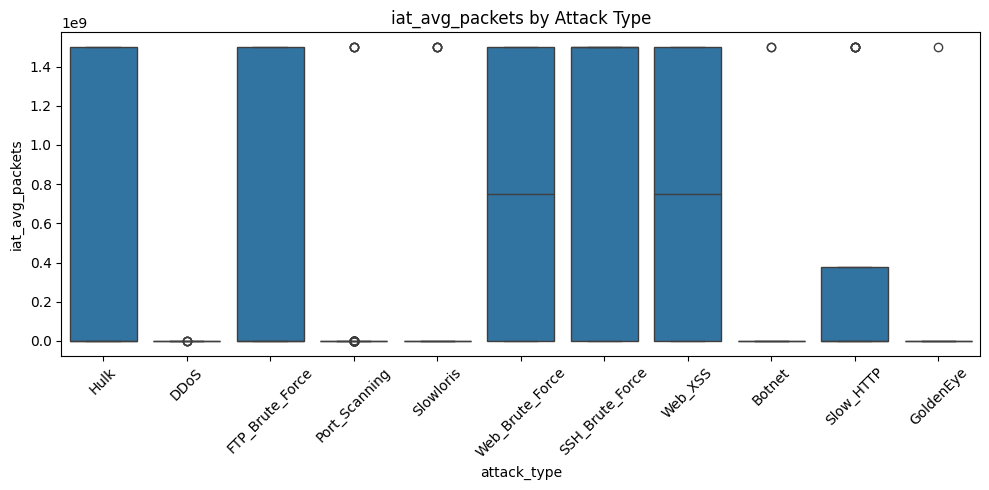

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 수치형 컬럼 리스트
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 'Benign' 제외 및 이상치 제거한 데이터프레임
filtered_train = train[(train.attack_type != 'Benign') & (~train.index.isin([72, 4166, 8354, 8594, 11117]))]

# 개별 박스 플롯 시각화
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=filtered_train, x='attack_type', y=col)
    plt.title(f"{col} by Attack Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 파생변수 생성
* payload_fwd_mean 과 payload_bwd_mean 매우 유사해서 하나로 합쳐도 될듯


In [8]:
train[numeric_cols].corr()

,port_src,port_dst,duration,pkt_count_fwd,pkt_count_bwd,rate_fwd_pkts,rate_bwd_pkts,rate_fwd_bytes,rate_bwd_bytes,payload_fwd_mean,payload_bwd_mean,tcp_win_fwd_init,tcp_win_bwd_init,tcp_syn_count,tcp_psh_count,tcp_rst_count,iat_avg_packets
port_src,1.000000,-0.693467,0.013886,0.004812,0.004406,-0.059077,-0.101180,-0.041025,-0.016920,0.087712,0.087712,0.154000,0.084909,0.128287,0.033545,-0.113640,-0.215044
port_dst,-0.693467,1.000000,-0.048083,-0.005557,-0.004935,0.061549,0.143903,0.040229,0.033787,-0.161225,-0.161225,-0.165396,-0.183389,-0.216712,-0.059539,0.144679,0.211954
duration,0.013886,-0.048083,1.000000,0.011286,0.010687,-0.017983,-0.017314,-0.006970,-0.021478,0.010122,0.010122,0.038217,0.090586,0.069744,0.102315,-0.065772,-0.091105
pkt_count_fwd,0.004812,-0.005557,0.011286,1.000000,0.999987,-0.001430,-0.025079,-0.000458,0.023476,0.041841,0.041841,0.003739,0.018715,0.016944,0.708619,-0.007296,-0.007763
pkt_count_bwd,0.004406,-0.004935,0.010687,0.999987,1.000000,-0.001505,-0.016470,-0.000626,0.023651,0.041500,0.041500,0.002968,0.017544,0.015679,0.707643,-0.007316,-0.007338
rate_fwd_pkts,-0.059077,0.061549,-0.017983,-0.001430,-0.001505,1.000000,0.553723,0.361698,0.176446,-0.057320,-0.057320,-0.015810,-0.074859,-0.045952,-0.021420,0.030783,-0.071786
rate_bwd_pkts,-0.101180,0.143903,-0.017314,-0.025079,-0.016470,0.553723,1.000000,0.008150,0.173318,-0.064236,-0.064236,-0.023948,-0.071070,-0.046694,-0.028487,0.055366,-0.066894
rate_fwd_bytes,-0.041025,0.040229,-0.006970,-0.000458,-0.000626,0.361698,0.008150,1.000000,0.017766,0.070797,0.070797,-0.025066,-0.029608,-0.033956,-0.007845,-0.001510,-0.025481
rate_bwd_bytes,-0.016920,0.033787,-0.021478,0.023476,0.023651,0.176446,0.173318,0.017766,1.000000,0.053881,0.053881,-0.059967,-0.063099,-0.079743,-0.004427,-0.040305,-0.082015
payload_fwd_mean,0.087712,-0.161225,0.010122,0.041841,0.041500,-0.057320,-0.064236,0.070797,0.053881,1.000000,1.000000,0.346741,0.610329,0.578415,0.162097,0.169647,-0.319113


In [9]:
import pandas as pd
import numpy as np

# 수치형 컬럼만 선택
numeric_cols = train.select_dtypes(include=['float64', 'int64'])

# 상관계수 행렬 계산
corr_matrix = numeric_cols.corr().abs()

# 상삼각행렬만 추출 (자기 자신 제외, 중복 제거)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 상관계수 0.8 이상인 변수쌍 찾기
high_corr_pairs = [(col, row, upper.loc[row, col])
                   for col in upper.columns
                   for row in upper.index
                   if upper.loc[row, col] >= 0.8]

# 보기 좋게 DataFrame으로 정리
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# 상관계수 순으로 정렬
high_corr_df = high_corr_df.sort_values(by='Correlation', ascending=False)

print(high_corr_df)

          Feature 1         Feature 2  Correlation
1  payload_bwd_mean  payload_fwd_mean     1.000000
0     pkt_count_bwd     pkt_count_fwd     0.999987


/tmp/ipython-input-10-661899749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_train['pkt_count_ratio'] = filtered_train['pkt_count_fwd'] / (filtered_train['pkt_count_bwd'] + 1)


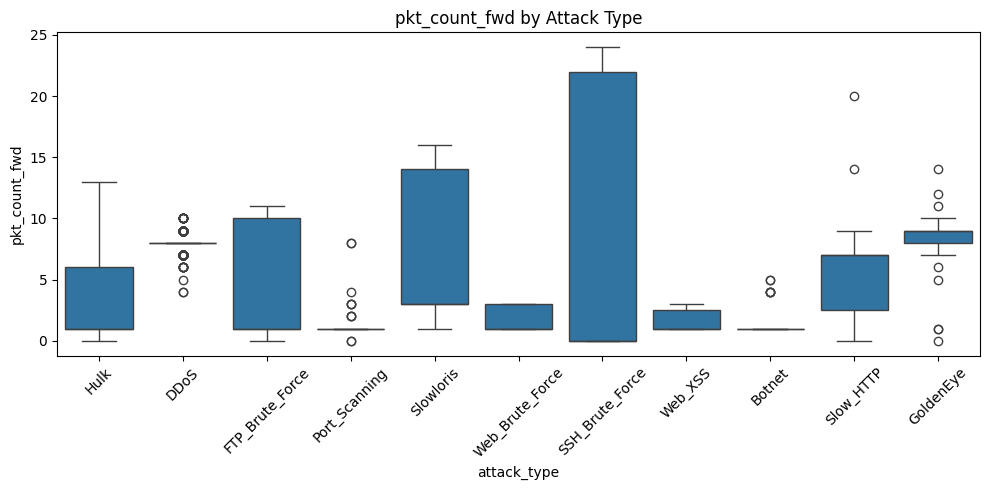

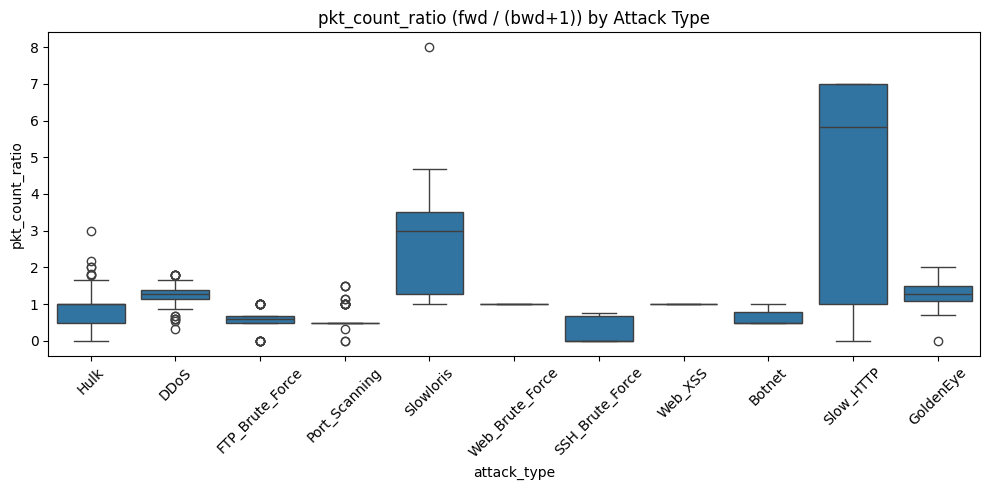

In [10]:
# 파생변수 생성
filtered_train['pkt_count_ratio'] = filtered_train['pkt_count_fwd'] / (filtered_train['pkt_count_bwd'] + 1)

# 시각화: 원본 변수
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_train, x='attack_type', y='pkt_count_fwd')
plt.title("pkt_count_fwd by Attack Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화: 파생 변수
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_train, x='attack_type', y='pkt_count_ratio')
plt.title("pkt_count_ratio (fwd / (bwd+1)) by Attack Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
otrain = train.drop([72, 4166, 8354, 8594, 11117])
otrain['pkt_count_ratio'] = otrain['pkt_count_fwd'] / (otrain['pkt_count_bwd'] + 1)

In [ ]:
otrain[['pkt_count_fwd', 'pkt_count_bwd', 'pkt_count_ratio']].corr()

,pkt_count_fwd,pkt_count_bwd,pkt_count_ratio
pkt_count_fwd,1.000000,0.970789,0.088488
pkt_count_bwd,0.970789,1.000000,0.001277
pkt_count_ratio,0.088488,0.001277,1.000000


In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = otrain[['pkt_count_fwd', 'pkt_count_bwd', 'pkt_count_ratio']]  # outlier만 제거한 경우
y = otrain['attack_type']

fX = filtered_train[['pkt_count_fwd', 'pkt_count_bwd', 'pkt_count_ratio']]  # outlier + 정상 Benign 제거
fy = filtered_train['attack_type']

print(mutual_info_classif(X, y))
print(mutual_info_classif(fX, fy))

[0.30919943 0.30148782 0.36303604]
[0.52191453 0.61080166 0.75535615]


### 로그 변환
* rate_fwd_pkts 1e6
* rate_bwd_pkts 1e6
* rate_fwd_bytes 1e8
* rate_bwd_bytes 1e7
* iat_avg_packets 1e9

In [ ]:
import numpy as np

# 로그 스케일 적용 대상 변수
log_cols = [
    'rate_fwd_pkts',
    'rate_bwd_pkts',
    'rate_fwd_bytes',
    'rate_bwd_bytes',
    'iat_avg_packets'
]

# 로그 스케일 변환 (log1p 사용으로 0도 안전하게 변환 가능)
for col in log_cols:
    otrain[f'log_{col}'] = np.log1p(otrain[col])

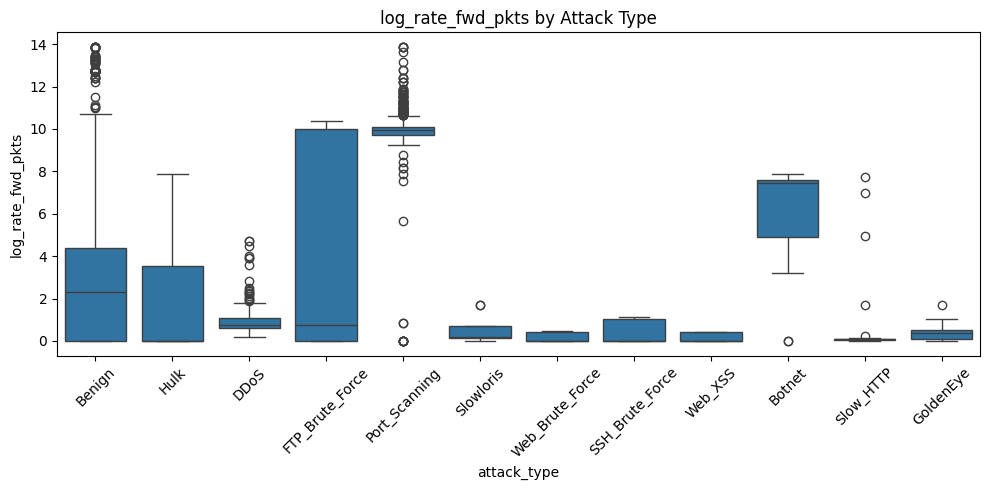

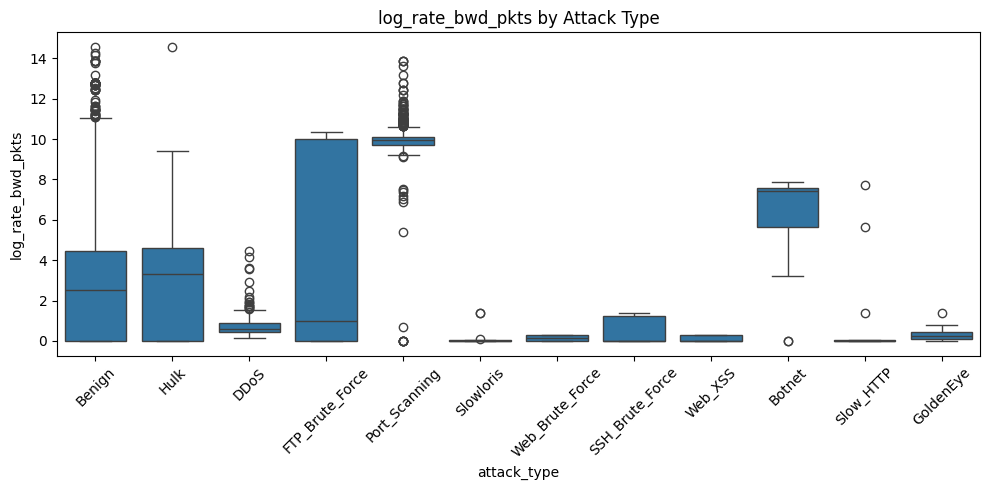

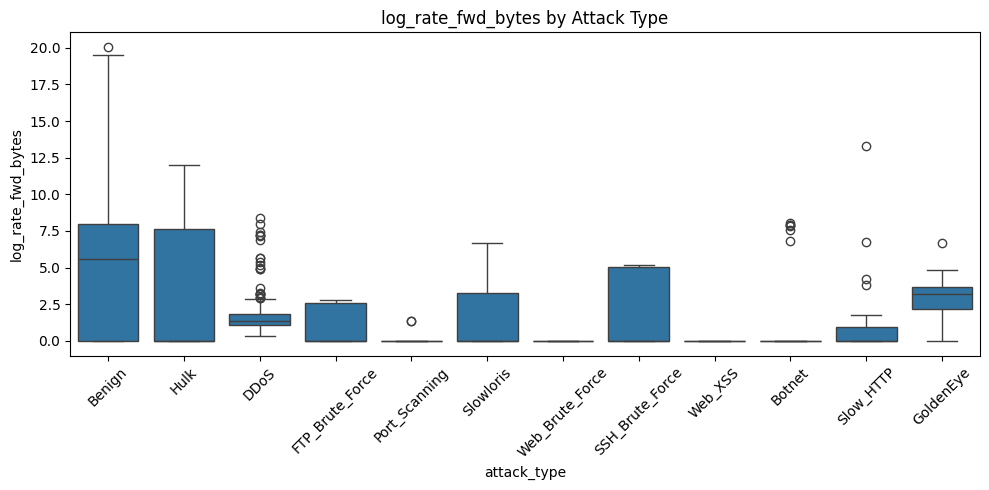

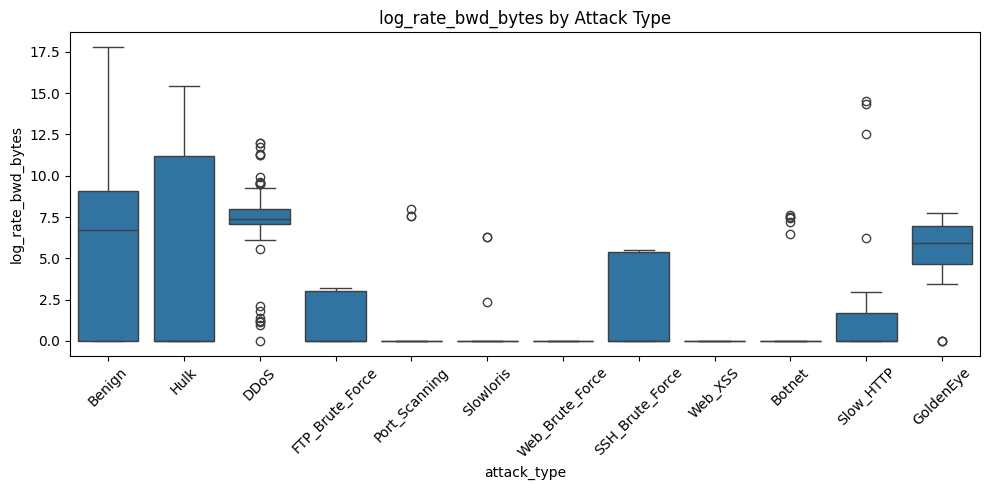

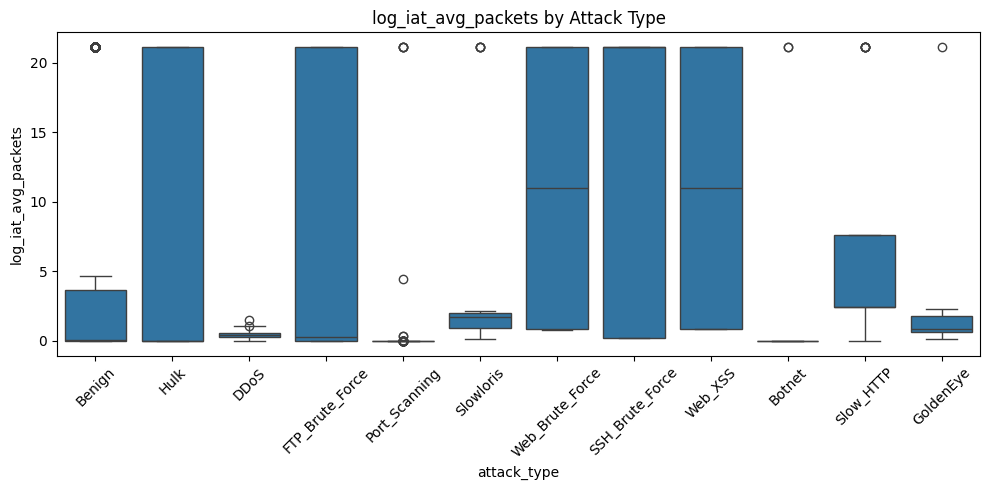

In [ ]:
for col in log_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=otrain, x='attack_type', y=f'log_{col}')
    plt.title(f"log_{col} by Attack Type")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 소수 클래스 증강

In [ ]:
otrain['attack_type'].value_counts()

,count
attack_type,
Benign,8787
Hulk,1719
Port_Scanning,793
DDoS,471
FTP_Brute_Force,47
GoldenEye,41
Slow_HTTP,34
SSH_Brute_Force,30
Botnet,27


In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

numeric = otrain.select_dtypes(include=['float64', 'int64']).columns.tolist()
imputer = KNNImputer(n_neighbors=5)
otrain[numeric] = imputer.fit_transform(otrain[numeric])

attack_label = LabelEncoder()
protocol_label = LabelEncoder()
otrain['attack_type'] = attack_label.fit_transform(otrain['attack_type'])
otrain['protocol'] = protocol_label.fit_transform(otrain['protocol'])

# 소수 클래스 3배 증강
oX = otrain.drop(columns=['attack_type'])
oy = otrain['attack_type']

target_distribution = {class_id: count * 3 if count <= 100 else count
                       for class_id, count in Counter(oy).items()}
smote = SMOTE(sampling_strategy=target_distribution, random_state=42, k_neighbors=3)
oX_bal, oy_bal = smote.fit_resample(oX, oy)

oy_bal.value_counts()

,count
attack_type,
0,8787
5,1719
6,793
2,471
3,141
4,123
8,102
7,90
1,81


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(oy_bal),
    y=oy_bal
)

class_weight_dict = dict(enumerate(class_weights))

# 샘플 가중치 생성
sample_weights = pd.Series(oy_bal).map(class_weight_dict)
n_classes = len(np.unique(oy_bal))

print(class_weights)
print(dict(enumerate(class_weights)))

[ 0.11799628 12.80041152  2.20134466  7.3534279   8.4295393   0.60316075
  1.30748214 11.52037037 10.16503268 13.82444444 24.68650794 57.60185185]
{0: np.float64(0.11799628238685937), 1: np.float64(12.800411522633745), 2: np.float64(2.2013446567586694), 3: np.float64(7.3534278959810875), 4: np.float64(8.429539295392955), 5: np.float64(0.6031607523754121), 6: np.float64(1.3074821353509878), 7: np.float64(11.52037037037037), 8: np.float64(10.165032679738562), 9: np.float64(13.824444444444444), 10: np.float64(24.686507936507937), 11: np.float64(57.601851851851855)}


### 정리

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 수치형 변수 결측값 처리
numeric = train.select_dtypes(include=['float64', 'int64']).columns.tolist()
imputer = KNNImputer(n_neighbors=5)
train[numeric] = imputer.fit_transform(train[numeric])

# 범주형 변수 인코딩
attack_label = LabelEncoder()
protocol_label = LabelEncoder()
train['attack_type'] = attack_label.fit_transform(train['attack_type'])
train['protocol'] = protocol_label.fit_transform(train['protocol'])

# 다중공선성
train['pkt_count_ratio'] = train['pkt_count_fwd'] / (train['pkt_count_bwd'] + 1)

# 로그 스케일링
log_cols = ['rate_fwd_pkts', 'rate_bwd_pkts', 'rate_fwd_bytes', 'rate_bwd_bytes', 'iat_avg_packets']
for col in log_cols:
    train[f'log_{col}'] = np.log1p(train[col])

# 불필요한 변수 제거
train = train.drop(columns=['ID', 'ip_src', 'ip_dst', 'rate_fwd_pkts',
    'rate_bwd_pkts', 'rate_fwd_bytes', 'rate_bwd_bytes', 'iat_avg_packets',
    'pkt_count_fwd', 'pkt_count_bwd', 'payload_bwd_mean'])

# 이상치 제거
train = train.drop([72, 4166, 8354, 8594, 11117])

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight

# 분리
X = train.drop(columns=['attack_type'])
y = train['attack_type']

# 학습+검증 : 테스트
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1024)

# 학습 : 검증
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=1024)

# 소수 클래스 3배 증강
target_distribution = {class_id: count * 3 if count <= 100 else count
                       for class_id, count in Counter(y_train).items()}
smote = SMOTE(sampling_strategy=target_distribution, random_state=42, k_neighbors=3)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 클래스 가중치 계산
classes = np.unique(y_train_bal)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_bal)
class_weight_dict = dict(zip(classes, weights))
sample_weights = pd.Series(y_train_bal).map(class_weight_dict)

In [ ]:
!pip install catboost

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    objective='multi:softprob',
    num_class=len(classes),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    verbosity=0
)
xgb_model.fit(X_train_bal, y_train_bal, sample_weight=sample_weights)

lgb_model = LGBMClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    objective='multiclass',
    num_class=len(classes),
    metric='multi_logloss',
    random_state=42,
    verbosity=-1,
    force_col_wise=True
)
lgb_model.fit(X_train_bal, y_train_bal, sample_weight=sample_weights)

cat_model = CatBoostClassifier(
    iterations=300,
    depth=5,
    learning_rate=0.1,
    loss_function='MultiClass',
    random_seed=42,
    verbose=False
)
cat_model.fit(X_train_bal, y_train_bal, sample_weight=sample_weights)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

xgb_val_pred = xgb_model.predict(X_val)
lgb_val_pred = lgb_model.predict(X_val)
cat_val_pred = cat_model.predict(X_val)

models = ['XGBoost', 'LightGBM', 'CatBoost']
preds = [xgb_val_pred, lgb_val_pred, cat_val_pred]

for model, pred in zip(models, preds):
    acc = accuracy_score(y_val, pred)
    f1_macro = f1_score(y_val, pred, average='macro')
    f1_weight = f1_score(y_val, pred, average='weighted')

    print(f"{model:10} acc: {acc:.4f} macro: {f1_macro:.4f} weight: {f1_weight:.4f}")

XGBoost    acc: 0.9870 macro: 0.7070 weight: 0.9873
LightGBM   acc: 0.9896 macro: 0.7120 weight: 0.9897
CatBoost   acc: 0.9640 macro: 0.6025 weight: 0.9709


In [ ]:
final_pred = (xgb_model.predict_proba(X_val) +
              lgb_model.predict_proba(X_val) +
              cat_model.predict_proba(X_val)) / 3
ensemble_pred = np.argmax(final_pred, axis=1)

array([0, 0, 0, ..., 0, 0, 6])

In [ ]:
f1_score(y_val, ensemble_pred, average='macro')

0.7743900618262604

In [ ]:
lgb_test_pred = lgb_model.predict(X_test)
acc = accuracy_score(y_test, lgb_test_pred)
f1_macro = f1_score(y_test, lgb_test_pred, average='macro')
f1_weight = f1_score(y_test, lgb_test_pred, average='weighted')

print(f"LightGBM   acc: {acc:.4f} macro: {f1_macro:.4f} weight: {f1_weight:.4f}")

LightGBM   acc: 0.9867 macro: 0.7847 weight: 0.9871


In [ ]:
# 수치형 변수 결측값 처리
numeric = test.select_dtypes(include=['float64', 'int64']).columns.tolist()
imputer = KNNImputer(n_neighbors=5)
test[numeric] = imputer.fit_transform(test[numeric])

# 범주형 변수 인코딩
protocol_label = LabelEncoder()
test['protocol'] = protocol_label.fit_transform(test['protocol'])

# 다중공선성
test['pkt_count_ratio'] = test['pkt_count_fwd'] / (test['pkt_count_bwd'] + 1)

# 로그 스케일링
log_cols = ['rate_fwd_pkts', 'rate_bwd_pkts', 'rate_fwd_bytes', 'rate_bwd_bytes', 'iat_avg_packets']
for col in log_cols:
    test[f'log_{col}'] = np.log1p(test[col])

# 불필요한 변수 제거
test = test.drop(columns=['ID', 'ip_src', 'ip_dst', 'rate_fwd_pkts',
    'rate_bwd_pkts', 'rate_fwd_bytes', 'rate_bwd_bytes', 'iat_avg_packets',
    'pkt_count_fwd', 'pkt_count_bwd', 'payload_bwd_mean'])

In [ ]:
lgb_sub_pred = lgb_model.predict(test)
lgb_sub_label = attack_label.inverse_transform(lgb_sub_pred)

In [ ]:
final_pred = (xgb_model.predict_proba(test) +
              lgb_model.predict_proba(test) +
              cat_model.predict_proba(test)) / 3
ensemble_pred = np.argmax(final_pred, axis=1)
ensemble_label = attack_label.inverse_transform(ensemble_pred)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission['attack_type'] = ensemble_label
sample_submission.to_csv('ensemble_submission.csv', index=False)

In [ ]:
sample_submission['attack_type'].value_counts()

,count
attack_type,
Benign,2202
Hulk,431
Port_Scanning,196
DDoS,116
FTP_Brute_Force,12
GoldenEye,11
Web_Brute_Force,8
Botnet,6
SSH_Brute_Force,5


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   port_src             3000 non-null   float64
 1   port_dst             3000 non-null   float64
 2   protocol             3000 non-null   int64  
 3   duration             3000 non-null   float64
 4   payload_fwd_mean     3000 non-null   float64
 5   tcp_win_fwd_init     3000 non-null   float64
 6   tcp_win_bwd_init     3000 non-null   float64
 7   tcp_syn_count        3000 non-null   float64
 8   tcp_psh_count        3000 non-null   float64
 9   tcp_rst_count        3000 non-null   float64
 10  pkt_count_ratio      3000 non-null   float64
 11  log_rate_fwd_pkts    3000 non-null   float64
 12  log_rate_bwd_pkts    3000 non-null   float64
 13  log_rate_fwd_bytes   3000 non-null   float64
 14  log_rate_bwd_bytes   3000 non-null   float64
 15  log_iat_avg_packets  3000 non-null   f